In [ ]:
import numpy as np
import h5py
from obspy.core import read, UTCDateTime
from obspy.io.sac.util import get_sac_reftime
from obspy.signal.filter import lowpass, bandpass, highpass

st = read('/home/irene/Documents/Datos-Tesis/Estaciones/*HHZ*')

prev_time = 5.0
post_time = 5.0

total_time = prev_time + post_time

count = 1
for tr in st:
    transformed_path = '/home/irene/Documents/Datos-Tesis/Training_window_set_1/training_data_' + str(count) + '.h5'
    if 'a' in tr.stats.sac and tr.stats.sac.a is not None:
        ref_time_event = get_sac_reftime(tr.stats.sac)
        atime_pick = ref_time_event + tr.stats.sac.a
        ini_cut = atime_pick - prev_time
        end_cut = atime_pick + post_time

        tr.filter('bandpass', freqmin=1.0, freqmax=10.0, corners=4, zerophase=True)
        tr.normalize()
        tr.trim(starttime = ini_cut, endtime = end_cut, nearest_sample=True, pad=True, fill_value=0)
        picker_p = int(tr.data.shape[0] * (prev_time/total_time))
        X = tr.data
        Y = np.zeros(len(X))
        Y[picker_p] = 1
        h5f = h5py.File(transformed_path)
        h5f.create_dataset('normal', data=X)
        h5f.create_dataset('transformed', data=Y)
        h5f.close()
        count = count + 1

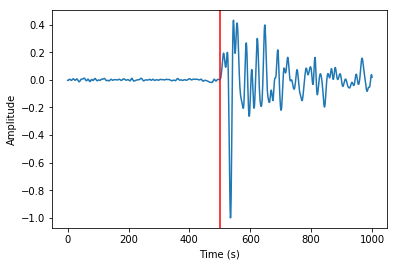

In [4]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
h5f = h5py.File('/home/irene/Documents/Datos-Tesis/Training_window_set_1/training_data_97.h5', 'r')

X = h5f['normal'][:]
Y = h5f['transformed'][:]

picker_p = np.argmax(Y)
plt.plot(X)

plt.axvline(x=picker_p , color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
